# 6.5 적절한 하이퍼파라미터 값 찾기(p.221)
- 하이퍼파라미터 : 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등
- 하이퍼파라미터의 값을 최대한 효율적으로 탐색하는 방법을 설명한다. 

## 6.5.1 검증 데이터 
- 훈련데이터 : 매개변수 학습
- 검증데이터 : 하이퍼파라미터 성능 평가
- 시험데이터 : 신경망의 범용 성능 평가

## 6.5.2 하이퍼파라미터 최적화
- 0 단계 : 하이퍼파라미터 값의 범위를 설정한다.  
    + 범위는 '대략적으로' 지정하는 것이 효과적 (로그 스케일로 지정)
- 1 단계 : 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.
- 2 단계 : 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다. (단, 에폭은 작게 설정)
    + 딥러닝 학습에는 오랜 시간이 걸림. 나쁠 듯한 값은 일찍 포기 그래서 학습을 위한 에폭을 작게하여, 1회 평가에 걸리는 시간 단축 
- 3 단계 : 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다. 

## 6.5.3 하이퍼파라미터 최적화 구현하기

In [10]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from deepLearningFromScratchMaster.dataset.mnist import load_mnist
from deepLearningFromScratchMaster.common.multi_layer_net import MultiLayerNet
from deepLearningFromScratchMaster.common.util import shuffle_dataset
from deepLearningFromScratchMaster.common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True) # 60,000

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

In [11]:
# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

In [12]:
print(x_train.shape)
print(x_train.shape[0])
print(validation_num)

(500, 784)
500
100


In [13]:
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [14]:
import numpy as np
print(np.random.permutation(10))

[7 8 3 0 5 2 6 9 4 1]


In [15]:
print(x_val.shape)
print(t_val.shape)
print(x_train.shape)
print(t_train.shape)

(100, 784)
(100,)
(400, 784)
(400,)


In [16]:
def __train(lr, weight_decay, epocs=50): # 두 개의 찾아야할(튜닝할) 하이퍼파라미터 
    # 뉴럴네트워크 인스턴스
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay) # weight_decay에 따라 각각 다른 뉴럴네트워크
    # 훈련 인스턴스
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    # 훈련 메서드
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list
           #검증용데이터의정확도, 훈련용데이터의정확도

In [8]:
# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100 # 100개의 neral network 만든다. 
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4) # 랜덤하게 고른(uniform)확률로 뽑는다.
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.11 | lr:5.423743383391448e-06, weight decay:5.229551930737735e-08
val acc:0.46 | lr:0.004067052659285014, weight decay:5.035538116065419e-06
val acc:0.08 | lr:7.494855317775706e-05, weight decay:3.2645982773699794e-06
val acc:0.11 | lr:2.1131352739410965e-06, weight decay:4.256312629606863e-05
val acc:0.12 | lr:0.0002206525116089358, weight decay:4.401359599936348e-06
val acc:0.05 | lr:7.237837005073532e-05, weight decay:1.5084715949710988e-05
val acc:0.34 | lr:0.0021589655607816404, weight decay:2.0244420780576642e-08
val acc:0.15 | lr:0.0001414306503362479, weight decay:1.647884993866902e-05
val acc:0.06 | lr:2.196424150390846e-05, weight decay:9.862255079096639e-05
val acc:0.08 | lr:0.0001804941268072798, weight decay:1.5935149056345823e-06
val acc:0.06 | lr:0.0002579654585612593, weight decay:1.2917079218300767e-06
val acc:0.33 | lr:0.004935736348797289, weight decay:9.36639613135765e-06
val acc:0.1 | lr:1.6356940933905484e-06, weight decay:8.674427498721141e-07
val acc:0

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.8) | lr:0.008900761684656089, weight decay:6.852804049814076e-07
Best-2(val acc:0.78) | lr:0.00988088593896123, weight decay:2.83419707331199e-07
Best-3(val acc:0.78) | lr:0.009149992593628082, weight decay:3.939580310576696e-08
Best-4(val acc:0.73) | lr:0.009113670454578128, weight decay:2.2804473250667693e-06
Best-5(val acc:0.68) | lr:0.0066439320487787475, weight decay:9.824918709668059e-08
Best-6(val acc:0.68) | lr:0.005616488652058835, weight decay:1.098777453782202e-06
Best-7(val acc:0.65) | lr:0.0070537109983751746, weight decay:1.2903165928297451e-08
Best-8(val acc:0.61) | lr:0.007224956760855982, weight decay:1.3928593522818195e-08
Best-9(val acc:0.59) | lr:0.0033220979287809206, weight decay:1.6848559023381748e-08
Best-10(val acc:0.49) | lr:0.0046192599962686905, weight decay:1.8158175718452098e-07
Best-11(val acc:0.47) | lr:0.002973218653931399, weight decay:8.979759488438712e-05
Best-12(val acc:0.4

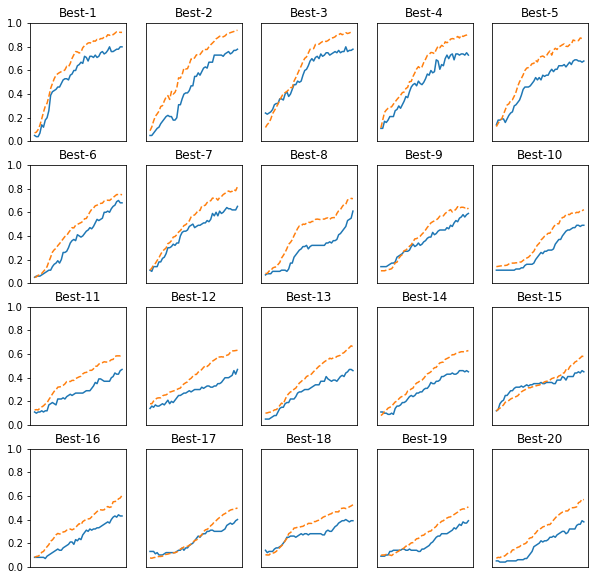

In [17]:
# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num)) # 4 (ceil:소수점이있으면올림을해서)
i = 0

plt.figure(figsize=(10,10))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key) #100개의 뉴럴네트워크중 가장 정확도가 높은거

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num: # 20개만 그리겠다. 
        break

plt.show()

In [18]:
x={1:6, 3:4, 2:5}
print(sorted(x))
print(sorted(x, reverse=True))
print(sorted(x.items(), key=lambda x:x[0]))
print(sorted(x.items(), key=lambda x:x[1]))
print(sorted(x.items(), key=lambda x:x[1], reverse=True))

[1, 2, 3]
[3, 2, 1]
[(1, 6), (2, 5), (3, 4)]
[(3, 4), (2, 5), (1, 6)]
[(1, 6), (2, 5), (3, 4)]


## 6.6 정리

#### 매개변수 갱신방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다. 
- 확률적 경사 하강법(SGD) : gradient의 반대방향으로 learning_rate(보폭)을 조정해서 최적점에 도달하는 방법. 단점은 로컬 미니마, 안장점에 빠질 수 있고, 진동으로 비효율적인 움직임.
- 모멘텀 : 물리계의 관성 개념 추가, 안장점이나 로컬미니마를 관성에 의해서 빠져나올 수 있다. 
- AdaGrad : 학습율을 고정된 상수로 생각하지 않고, 스텝마다 변수마다 학습율을 조정하면서 학습진행.
- Adam : 관성과 학습율 둘다. 

#### 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요하다.
- weigth의 표준편차를 작게 설정하면, 다수의 뉴런이 거의 같은 값을 출력하여 표현력 제한 문제 발생
- weight의 표준편차를 크게 하면 각 층의 활성화 값들이 0과 1에 치우치는 vanishing Gradient의 문제가 발생
- 적절한 값으로 초깃값을 설정하는 것이 중요.  

#### 가중치의 초깃값으로는 'Xavier 초깃값' 과 'He 초깃값'이 효과적이다. 
- Xavier 초깃값 : 활성화 함수를 Sigmoid로 선택할 때 사용 ( 평균 0, 분산 $\frac{1}{n}$, 표준편차 $\sqrt{\frac{1}{n}}$인 정규분포)
- He 초깃값 : 활성화 함수를 ReLU로 선택할 때 사용 ( 평균 0, 분산 $ \frac{2}{n}$, 표준편차 $\sqrt{\frac{2}{n}}$인 정규분포)  

#### 배치정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다. 
- 가중치 초깃값을 통해서 데이터 분포를 정하는 것이 아니라 아파인층과 활성화층 사이에 분포를 조절해줄 수 있는 층을 끼워넣어 평균과 표준편차를 머신이 스스로 학습해 나가는 방식.
- 장점 : 학습속도 개선, 초깃값에 덜 의존, 오버피팅 억제.
- 배치정규화 과정 (p.211) 

#### 오버피팅을 억제하면 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
- Weight Decay
    + 학습과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법
    + $L^2$-regularization : 새로운 손실함수 = 기존 손실함수 + ${\frac{1}{2}} \times \lambda \times$ (가중치의 제곱의 합)
        - 큰 가중치는 많이 낮추고, 작은 가중치는 적게 낮춘다. 
       
    + $L^1$-regularization : 새로운 손실함수 = 기존 손실함수 + $\lambda \times$ (가중치의 제곱의 합)
        - 모든 가중치를 동일하게 낮춰서 작은 가중치를 사라지게 한다. 
    + 여기서 $\lambda$는 정규화 세기를 조절하는 하이퍼파라미터, $\lambda$가 클수록 영향력을 더 많이 행사한다. 예를들어, $L^2$규제에서는 $\lambda$를 크게 설정할수록 큰 가중치에 대한 패널티가 커지게 된다. 
- 드롭아웃 
    + 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다. 
    + 훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위 선택하고, 시험 때는 모든 뉴런에 신호를 전달.
    
#### 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다. 

# 7. 합성곱 신경망(CNN)(p.227)
- Convolutional Neural Network
- 이미지 인식분야에서 딥러닝을 활요한 기법은 거의 CNN을 기초로 한다. 
## 7.1 전체구조
- 합성곱과 풀링 계층(pooling layer) 등장
- 지금까지 본 신경망은 모든 뉴런과 결합하는 완전연결(fully connected)계층을 Affine 계층이란 이름으로 구현



####  그림7-1 완전연결 계층(Affine 계층)으로 이루어진 네트워크 예  
<img src="./contents_images/fig 7-1.png"></img>


####  그림7-2 CNN으로 이루어진 네트워크의 예 : 합성곱 계층과 풀링 계층이 새로 추가(회색)
<img src="./contents_images/fig 7-2.png"></img>

# 부록 A. Softmax-with-Loss 계층의 계산 그래프 (p.291)